<a href="https://colab.research.google.com/github/shinjihirako13-vis/Elevate-Lab-Task-8/blob/main/Elevate_Lab_Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [4]:

from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [5]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [6]:
print(df.head())
print(df.describe())
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

In [8]:
data = df.drop(['CustomerID', 'Gender'], axis=1)

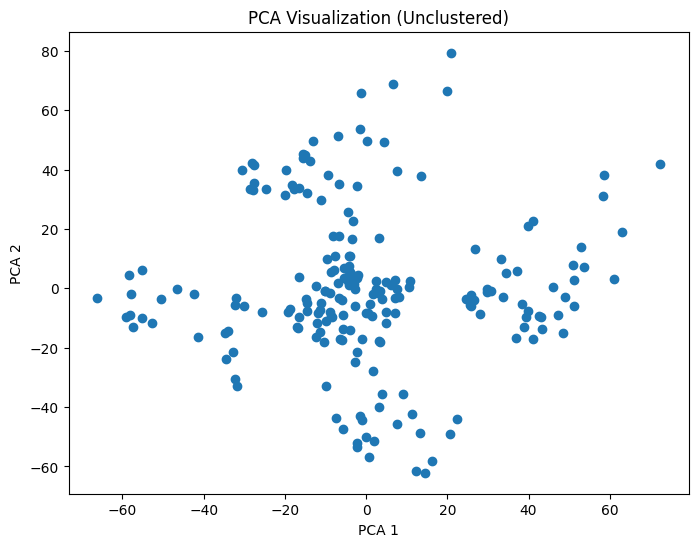

In [13]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('PCA Visualization (Unclustered)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

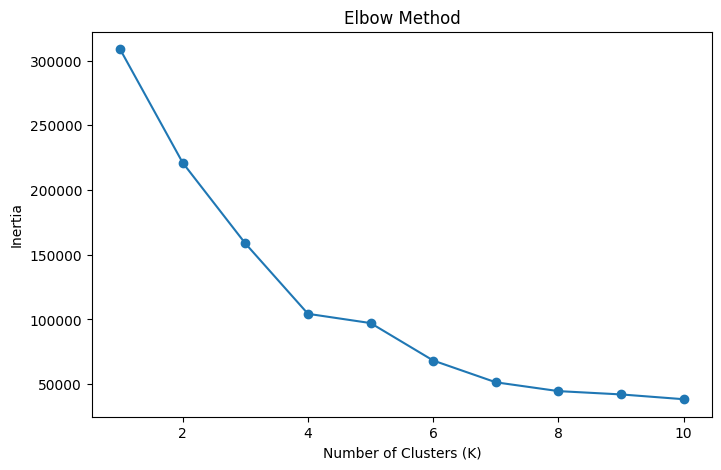

In [14]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [10]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(data)


In [11]:
df['Cluster'] = labels

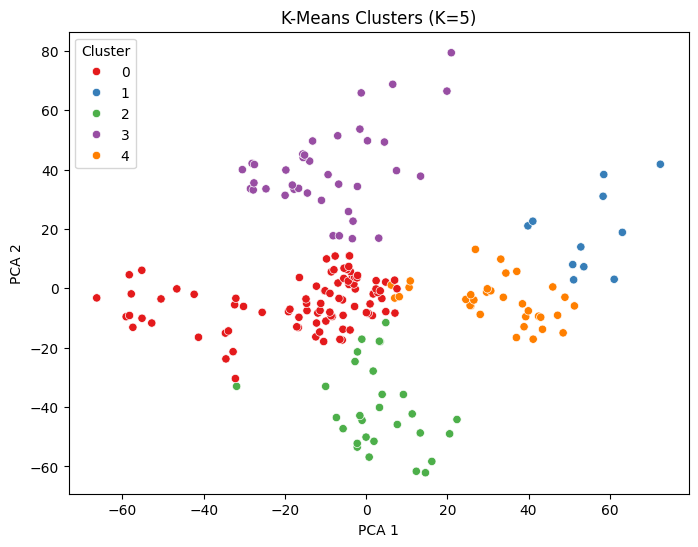

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette='Set1')
plt.title(f'K-Means Clusters (K={optimal_k})')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [16]:
score = silhouette_score(data, labels)
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.36
